In [4]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

# Road Accident Severity in India

#### While attending to our primary goal of using EDA(Exploratory Data Analysis ) to extract a variety of fascinating information, I have attempted to illustrate in this notebook the methodology of Properly Questioning the dataset.

#### The dataset offers data on a number of variables related to Road Accident Severity in India, such as the time of day, the day of the week, the age range of drivers, gender, educational attainment, car attributes, driving history, road conditions, and the seriousness of accidents. We can learn more about the trends, connections, and possible risk factors associated with auto accidents by examining this dataset. The dataset offers valuable insights into the dynamics of road accidents, enabling authorities, policymakers, and researchers to make informed decisions regarding road safety measures and interventions.

#### Lets import all the necessary Libraries for our EDA

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

#### Pandas is a powerful library for data manipulation and analysis. It provides data structures like Series and DataFrame, which are essential for handling and analyzing structured data.
#### NumPy is a numerical computing library that provides support for large, multi-dimensional arrays and matrices, along with mathematical functions to operate on these arrays.
#### Matplotlib is a 2D plotting library that produces static, animated, and interactive visualizations in Python. It provides a wide variety of charts and plots for data visualization.
#### Seaborn is a statistical data visualization library based on Matplotlib. It provides a high-level interface for creating attractive and informative statistical graphics.

### Data Extraction 
##### We take the raw data and extract that data to our notebook for analysis 
##### We took our data from Kaggle link down below.
# [Kaggle](https://www.kaggle.com/datasets/s3programmer/road-accident-severity-in-india/data)

In [13]:
file_path = r"C:\Users\Bhishma\OneDrive\Documents\Road.csv"
data = pd.read_csv(file_path)
data.sample(3)
warnings.filterwarnings("ignore")

In [ ]:
# head gives us first 5 datasets from this dataframe

In [14]:
data.head()

,Time,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Service_year_of_vehicle,...,Vehicle_movement,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Work_of_casuality,Fitness_of_casuality,Pedestrian_movement,Cause_of_accident,Accident_severity
0,17:02:00,Monday,18-30,Male,Above high school,Employee,1-2yr,Automobile,Owner,Above 10yr,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Moving Backward,Slight Injury
1,17:02:00,Monday,31-50,Male,Junior high school,Employee,Above 10yr,Public (> 45 seats),Owner,5-10yrs,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury
2,17:02:00,Monday,18-30,Male,Junior high school,Employee,1-2yr,Lorry (41?100Q),Owner,NaN,...,Going straight,Driver or rider,Male,31-50,3,Driver,NaN,Not a Pedestrian,Changing lane to the left,Serious Injury
3,1:06:00,Sunday,18-30,Male,Junior high school,Employee,5-10yr,Public (> 45 seats),Governmental,NaN,...,Going straight,Pedestrian,Female,18-30,3,Driver,Normal,Not a Pedestrian,Changing lane to the right,Slight Injury
4,1:06:00,Sunday,18-30,Male,Junior high school,Employee,2-5yr,NaN,Owner,5-10yrs,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury


In [ ]:
# tail gives us last 5 datasets from this dataframe.

In [15]:
data.tail()

,Time,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Service_year_of_vehicle,...,Vehicle_movement,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Work_of_casuality,Fitness_of_casuality,Pedestrian_movement,Cause_of_accident,Accident_severity
12311,16:15:00,Wednesday,31-50,Male,NaN,Employee,2-5yr,Lorry (11?40Q),Owner,NaN,...,Going straight,na,na,na,na,Driver,Normal,Not a Pedestrian,No distancing,Slight Injury
12312,18:00:00,Sunday,Unknown,Male,Elementary school,Employee,5-10yr,Automobile,Owner,NaN,...,Other,na,na,na,na,Driver,Normal,Not a Pedestrian,No distancing,Slight Injury
12313,13:55:00,Sunday,Over 51,Male,Junior high school,Employee,5-10yr,Bajaj,Owner,2-5yrs,...,Other,Driver or rider,Male,31-50,3,Driver,Normal,Not a Pedestrian,Changing lane to the right,Serious Injury
12314,13:55:00,Sunday,18-30,Female,Junior high school,Employee,Above 10yr,Lorry (41?100Q),Owner,2-5yrs,...,Other,na,na,na,na,Driver,Normal,Not a Pedestrian,Driving under the influence of drugs,Slight Injury
12315,13:55:00,Sunday,18-30,Male,Junior high school,Employee,5-10yr,Other,Owner,2-5yrs,...,Stopping,Pedestrian,Female,5,3,Driver,Normal,Crossing from nearside - masked by parked or s...,Changing lane to the right,Slight Injury


In [ ]:
# shape help us to nagivate how much columns and row are in this dataframe.

In [16]:
data.shape

(12316, 32)

In [ ]:
# The info() method prints information about the DataFrame.
# The information contains the number of columns, column labels, column data types, memory usage, range index, and the number of cells in each column (non-null values).

In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12316 entries, 0 to 12315
Data columns (total 32 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Time                         12316 non-null  object
 1   Day_of_week                  12316 non-null  object
 2   Age_band_of_driver           12316 non-null  object
 3   Sex_of_driver                12316 non-null  object
 4   Educational_level            11575 non-null  object
 5   Vehicle_driver_relation      11737 non-null  object
 6   Driving_experience           11487 non-null  object
 7   Type_of_vehicle              11366 non-null  object
 8   Owner_of_vehicle             11834 non-null  object
 9   Service_year_of_vehicle      8388 non-null   object
 10  Defect_of_vehicle            7889 non-null   object
 11  Area_accident_occured        12077 non-null  object
 12  Lanes_or_Medians             11931 non-null  object
 13  Road_allignment              12

In [ ]:
# The describe() method gives us summary statistics for numerical columns in our DataFrame.

In [18]:
data.describe()

,Number_of_vehicles_involved,Number_of_casualties
count,12316.000000,12316.000000
mean,2.040679,1.548149
std,0.688790,1.007179
min,1.000000,1.000000
25%,2.000000,1.000000
50%,2.000000,1.000000
75%,2.000000,2.000000
max,7.000000,8.000000


In [ ]:
# columns gives use the name of columns in the dataframe

In [19]:
data.columns

Index(['Time', 'Day_of_week', 'Age_band_of_driver', 'Sex_of_driver',
       'Educational_level', 'Vehicle_driver_relation', 'Driving_experience',
       'Type_of_vehicle', 'Owner_of_vehicle', 'Service_year_of_vehicle',
       'Defect_of_vehicle', 'Area_accident_occured', 'Lanes_or_Medians',
       'Road_allignment', 'Types_of_Junction', 'Road_surface_type',
       'Road_surface_conditions', 'Light_conditions', 'Weather_conditions',
       'Type_of_collision', 'Number_of_vehicles_involved',
       'Number_of_casualties', 'Vehicle_movement', 'Casualty_class',
       'Sex_of_casualty', 'Age_band_of_casualty', 'Casualty_severity',
       'Work_of_casuality', 'Fitness_of_casuality', 'Pedestrian_movement',
       'Cause_of_accident', 'Accident_severity'],
      dtype='object')

In [ ]:
# isna() give return False for every null value and True for every non null value.

In [20]:
data.isna().sum().reset_index()

,index,0
0,Time,0
1,Day_of_week,0
2,Age_band_of_driver,0
3,Sex_of_driver,0
4,Educational_level,741
5,Vehicle_driver_relation,579
6,Driving_experience,829
7,Type_of_vehicle,950
8,Owner_of_vehicle,482
9,Service_year_of_vehicle,3928


### Data Preprocessing ------- Data preprocessing is a step in the data mining and data analysis process that takes raw data and transforms it into a format that can be understood and analyzed by computers and machine learning.
#### To see all the columns in our data we use set_options --- For our visual easy to analyse data

In [21]:
pd.set_option('display.max_columns', None)
data.head()

,Time,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Service_year_of_vehicle,Defect_of_vehicle,Area_accident_occured,Lanes_or_Medians,Road_allignment,Types_of_Junction,Road_surface_type,Road_surface_conditions,Light_conditions,Weather_conditions,Type_of_collision,Number_of_vehicles_involved,Number_of_casualties,Vehicle_movement,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Work_of_casuality,Fitness_of_casuality,Pedestrian_movement,Cause_of_accident,Accident_severity
0,17:02:00,Monday,18-30,Male,Above high school,Employee,1-2yr,Automobile,Owner,Above 10yr,No defect,Residential areas,NaN,Tangent road with flat terrain,No junction,Asphalt roads,Dry,Daylight,Normal,Collision with roadside-parked vehicles,2,2,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Moving Backward,Slight Injury
1,17:02:00,Monday,31-50,Male,Junior high school,Employee,Above 10yr,Public (> 45 seats),Owner,5-10yrs,No defect,Office areas,Undivided Two way,Tangent road with flat terrain,No junction,Asphalt roads,Dry,Daylight,Normal,Vehicle with vehicle collision,2,2,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury
2,17:02:00,Monday,18-30,Male,Junior high school,Employee,1-2yr,Lorry (41?100Q),Owner,NaN,No defect,Recreational areas,other,NaN,No junction,Asphalt roads,Dry,Daylight,Normal,Collision with roadside objects,2,2,Going straight,Driver or rider,Male,31-50,3,Driver,NaN,Not a Pedestrian,Changing lane to the left,Serious Injury
3,1:06:00,Sunday,18-30,Male,Junior high school,Employee,5-10yr,Public (> 45 seats),Governmental,NaN,No defect,Office areas,other,Tangent road with mild grade and flat terrain,Y Shape,Earth roads,Dry,Darkness - lights lit,Normal,Vehicle with vehicle collision,2,2,Going straight,Pedestrian,Female,18-30,3,Driver,Normal,Not a Pedestrian,Changing lane to the right,Slight Injury
4,1:06:00,Sunday,18-30,Male,Junior high school,Employee,2-5yr,NaN,Owner,5-10yrs,No defect,Industrial areas,other,Tangent road with flat terrain,Y Shape,Asphalt roads,Dry,Darkness - lights lit,Normal,Vehicle with vehicle collision,2,2,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury


#### Convert the 'Time' column to datetime format

In [22]:
data['Time'] = data['Time'].astype('datetime64[ns]')
data.loc[::, "Time"].reset_index()

,index,Time
0,0,2024-04-21 17:02:00
1,1,2024-04-21 17:02:00
2,2,2024-04-21 17:02:00
3,3,2024-04-21 01:06:00
4,4,2024-04-21 01:06:00
...,...,...
12311,12311,2024-04-21 16:15:00
12312,12312,2024-04-21 18:00:00
12313,12313,2024-04-21 13:55:00
12314,12314,2024-04-21 13:55:00


## Data Cleaning
#### Data cleaning is the process of fixing or removing incorrect, corrupted, incorrectly formatted, duplicate, or incomplete data within a dataset.

In [23]:
data[["Casualty_class", "Sex_of_casualty", "Age_band_of_casualty", "Casualty_severity", "Work_of_casuality","Fitness_of_casuality"]].dropna()

,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Work_of_casuality,Fitness_of_casuality
3,Pedestrian,Female,18-30,3,Driver,Normal
5,Driver or rider,Male,31-50,3,Driver,Normal
6,Driver or rider,Female,18-30,3,Driver,Normal
8,Pedestrian,Male,Under 18,3,Driver,Normal
9,Passenger,Male,18-30,3,Driver,Normal
...,...,...,...,...,...,...
12311,na,na,na,na,Driver,Normal
12312,na,na,na,na,Driver,Normal
12313,Driver or rider,Male,31-50,3,Driver,Normal
12314,na,na,na,na,Driver,Normal


## Analysis With Exploratory Data Analysis
### Which age band of drivers is involved in the highest number of accidents?

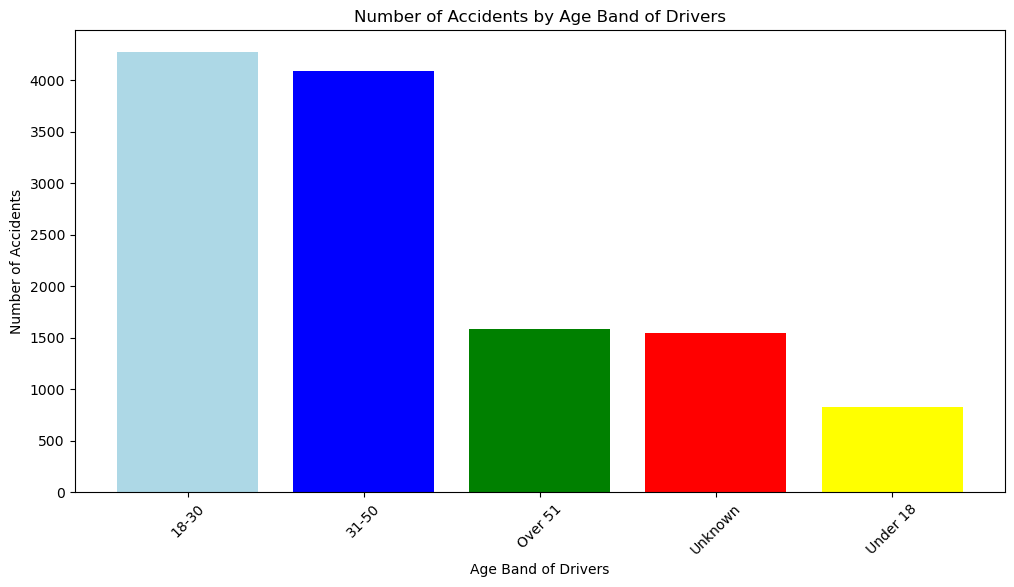

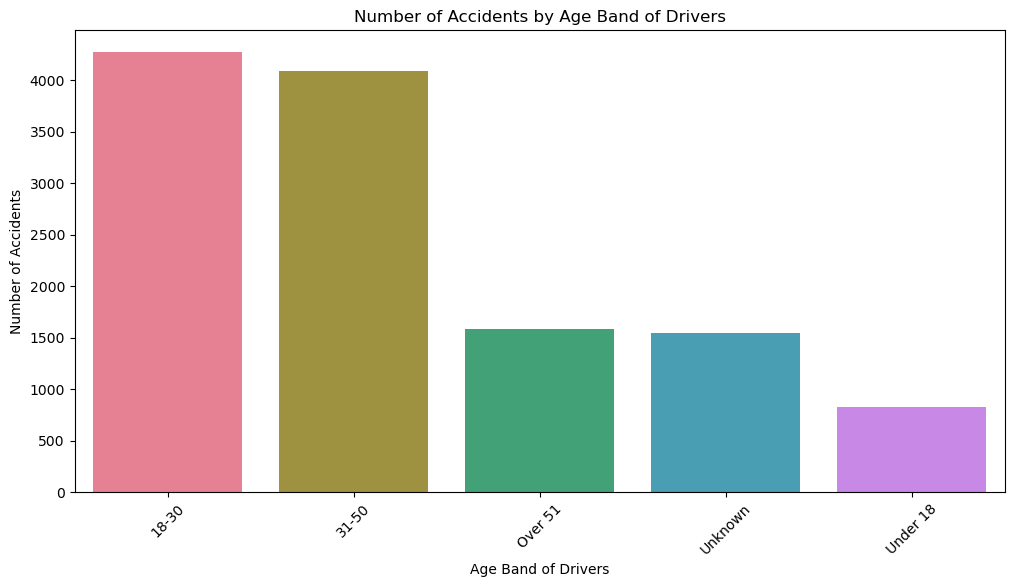

In [24]:
age_band_counts = data['Age_band_of_driver'].value_counts()
color = ['lightblue', 'blue', 'green', 'red', 'yellow']
plt.figure(figsize=(12, 6)) # This line creates a new Matplotlib figure with a specified size of 12 inches in width and 6 inches in height.
plt.bar(age_band_counts.index, age_band_counts.values, color=color) #The x-axis values are taken from the index of 'age_band_counts' (which represents the unique age bands), and the y-axis values are taken from the counts. The 'color' parameter specifies the colors of the bars.
plt.title('Number of Accidents by Age Band of Drivers') #This line sets the title of the plot.
plt.xlabel('Age Band of Drivers') #This line sets the label for the x-axis.
plt.ylabel('Number of Accidents') #This line sets the label for the y-axis.
plt.xticks(rotation=45) #This line rotates the x-axis labels by 45 degrees for better readability.
plt.show() # This line displays the plot.

# or we can also use sns for this 

plt.figure(figsize=(12, 6))
sns.barplot(x=age_band_counts.index, y=age_band_counts.values, palette="husl")
# This line uses Seaborn's barplot function to generate a bar chart. The x-axis values are specified by age_band_counts.index (representing the unique age bands), and the y-axis values are specified by age_band_counts.values (representing the counts). The palette="husl" parameter sets the color palette to "husl" for the bars.
plt.title('Number of Accidents by Age Band of Drivers')
plt.xlabel('Age Band of Drivers')
plt.ylabel('Number of Accidents')
plt.xticks(rotation=45)
plt.show()

### Conclusion:-
#### 1. The age band with the highest number of accidents is 18-30 and also their is not huge difference in 31-50 age band 
#### 2. To better target safety measures, it would be helpful to look into the causes of the high accident rate in the designated age group.
***

### On which day of the week do accidents most commonly occur?

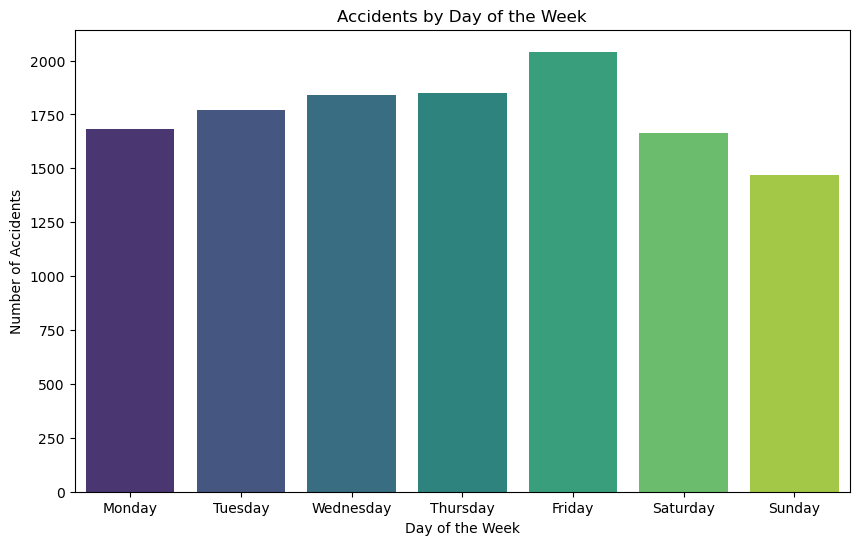

In [25]:
day_of_week_counts = data['Day_of_week'].value_counts()
days_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
day_of_week_counts = day_of_week_counts.reindex(days_order) # The reindex method in pandas is used to change the order of the elements in a Series or DataFrame along a particular axis. It returns a new object with the data conformed to a new index.
plt.figure(figsize=(10, 6))
sns.barplot(x=day_of_week_counts.index, y=day_of_week_counts, palette='viridis')
plt.title('Accidents by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Accidents')
plt.show()

### Conclusion:-
#### The graph displays the days with the most and least accidents. The days with the highest bars are the ones that had the most accidents, as you can see.
***


###  What is the most common educational level among drivers involved in accidents?

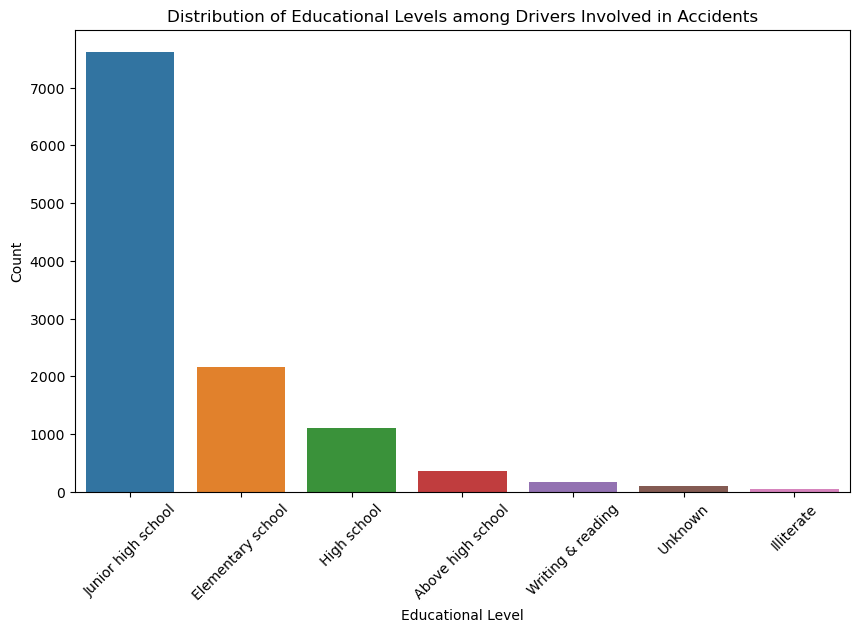

In [26]:
education_counts = data['Educational_level'].value_counts()
most_common_education = education_counts.idxmax() # The idxmax() method in pandas is used to find the index (label) of the first occurrence of the maximum value in a Series.
plt.figure(figsize=(10, 6))
sns.countplot(x='Educational_level', data=data, order=data['Educational_level'].value_counts().index)
plt.title('Distribution of Educational Levels among Drivers Involved in Accidents')
plt.xlabel('Educational Level')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

### Conclusion:-
#### 1. The analysis of the dataset reveals that the most common educational level among drivers involved in accidents is Junior high school .
#### 2. The demographics of drivers impacted by accidents are shown by this data, which may be useful for focused safety initiatives and awareness campaigns.
***

### Can you identify any patterns in accidents such as specific hours of the day or days of the week when accidents are more likely to occur?

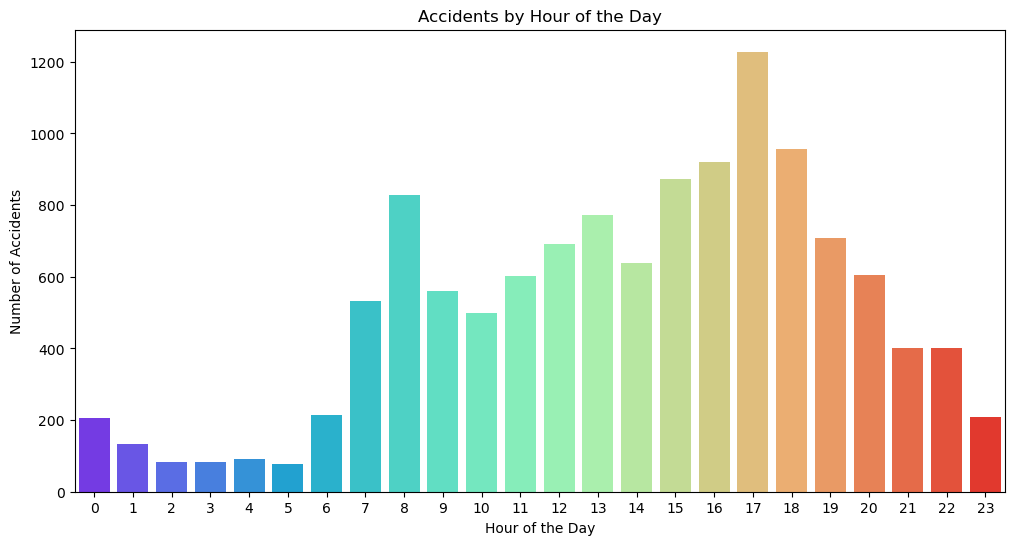

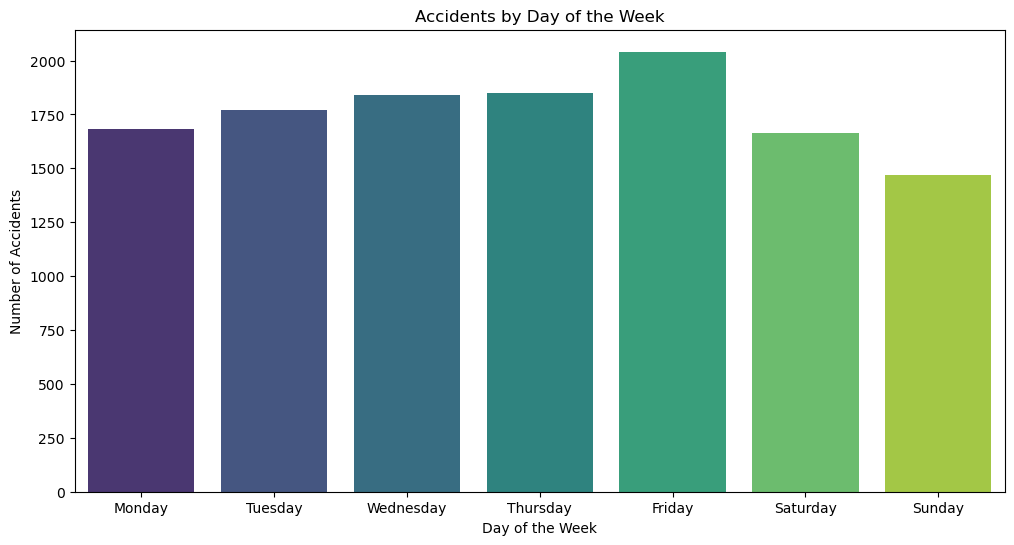

In [27]:
data['Hour'] = data['Time'].dt.hour #  Extracts the hour component from the 'Time' column and creates a new column called 'Hour' in the DataFrame 'data'.
data['Day_of_week'] = pd.Categorical(data['Day_of_week'], categories=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'], ordered=True)
# Converts the 'Day_of_week' column to a categorical variable with the specified order of categories (days of the week).
plt.figure(figsize=(12, 6))
sns.countplot(x='Hour', data=data, palette='rainbow')
plt.title('Accidents by Hour of the Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Accidents')
plt.show()
plt.figure(figsize=(12, 6))
sns.countplot(x='Day_of_week', data=data, palette='viridis')
plt.title('Accidents by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Accidents')
plt.show()

# Conclusion:-
#### 1. Accidents tend to occur more frequently during certain hours of the day.
#### 2. There are variations in the number of accidents throughout the days of the week. Accidents do not seems to have any relation with days of week
***


### Which Vehicles tends to had more number of accidents ?

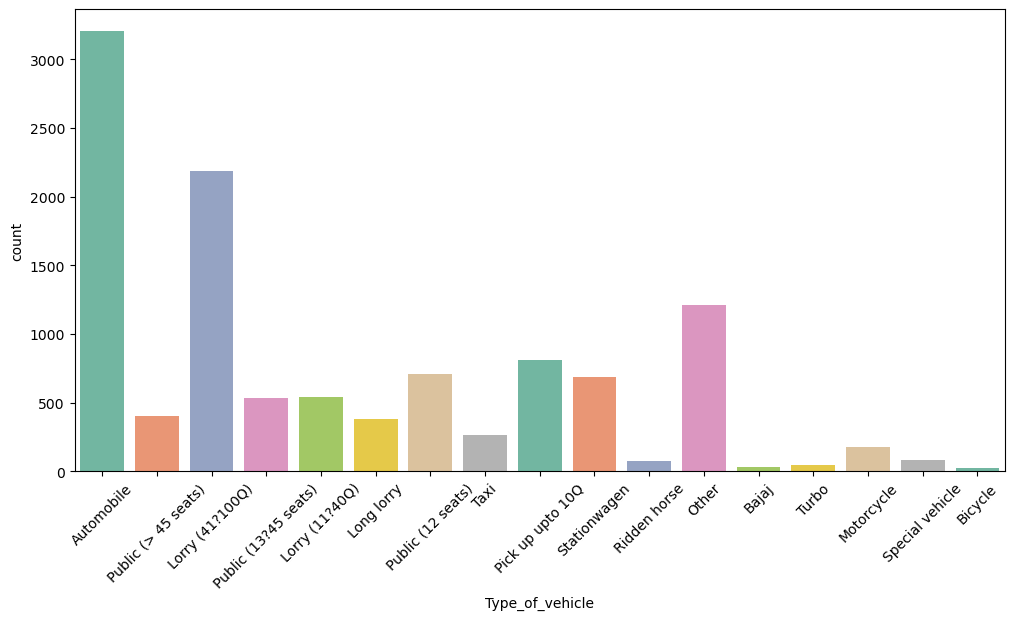

In [28]:
accident_due_vehicles = data["Type_of_vehicle"].reset_index() #  When you apply reset_index(), it resets the index of the DataFrame or Series and creates a new default integer index.
plt.figure(figsize = (12, 6))
sns.countplot(x='Type_of_vehicle',data=accident_due_vehicles,palette='Set2')
plt.xticks(rotation=45)
plt.show()

#### Automobile vehicles tends to had more number of accidents
***

### How do the patterns of accidents change during weekends compared to weekdays?

In [29]:
data['Weekday'] = data['Day_of_week'].apply(lambda x: 'Weekend' if x in ['Saturday', 'Sunday'] else 'Weekday')
weekday_weekend_counts = data.groupby(['Weekday', 'Accident_severity']).size().unstack().reset_index() #unstack() is used to reshape the given Pandas DataFrame by transposing specified row level to column level.
print(weekday_weekend_counts)


Accident_severity  Weekday  Fatal injury  Serious Injury  Slight Injury
0                  Weekday            86            1308           7789
1                  Weekend            72             435           2626


### Conclusion:-
#### 1. Overall, the majority of accidents result in slight injuries, with the highest counts observed on weekdays.
#### 2. Serious injuries also have a higher frequency on weekdays compared to weekends.
#### 3.  The count of slight injuries is significantly higher on weekdays (7789) than on weekends (2626).
***

### Find correlation between Number_of_vehicles_involved and Number_of_casualties?

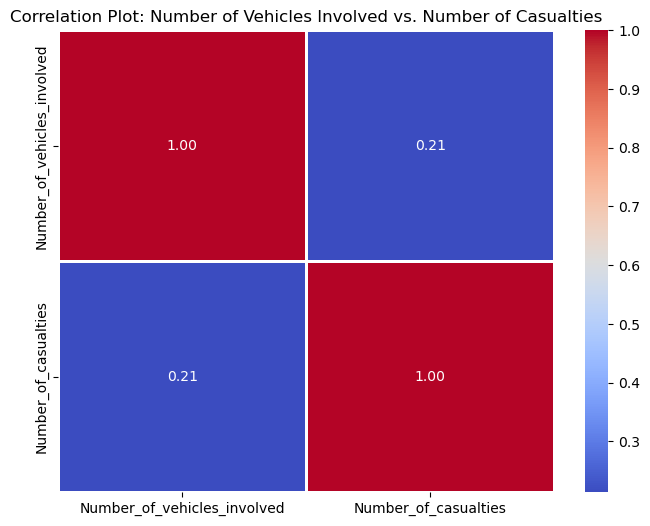

In [30]:
find_cor = data[['Number_of_vehicles_involved', 'Number_of_casualties']]
correlation_mat = find_cor.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(data=correlation_mat, annot=True, cmap='coolwarm', fmt='.2f', linewidths=1)
plt.title('Correlation Plot: Number of Vehicles Involved vs. Number of Casualties')
plt.show()

### Counclusion:-
#### Correlation coefficient is positive (closer to 1), it suggests a positive correlation. In this context, it could mean that as the number of vehicles involved in an accident increases, the number of casualties also tends to increase.
***

### Create a new column(Morning, Afternoon, Evening, Night) based on the time of the accident. 

In [32]:
data['Time'] = pd.to_datetime(data['Time'], errors='coerce') # If the error argument is passed as coerce , then invalid parsing will be set as NaN .
def categorize_part_of_day(hour):
    if 5 <= hour < 12:
        return 'Morning'
    elif 12 <= hour < 18:
        return 'Afternoon'
    elif 18 <= hour < 24:
        return 'Evening'
    else:
        return 'Night'
data['Part_of_Day'] = data['Time'].dt.hour.apply(categorize_part_of_day)
data["Part_of_Day"].value_counts()

Part_of_Day
Afternoon    5125
Morning      3312
Evening      3280
Night         599
Name: count, dtype: int64

### List most common Accident_severity according to Driving_experience wise

In [33]:
grouped_data  = data.groupby('Driving_experience')['Accident_severity'].value_counts()
most_common_sources = grouped_data.groupby('Accident_severity').idxmax()
most_common_sources

Accident_severity
Fatal injury         (2-5yr, Fatal injury)
Serious Injury    (5-10yr, Serious Injury)
Slight Injury      (5-10yr, Slight Injury)
Name: count, dtype: object

### Counclusion:-
#### 1. This category implies injuries that are fatal caused by Driver with experience 2 to 5 years old.
#### 2. This category implies injuries that are Serious caused by Driver with experience 5 to 10 years old
#### 3. This category implies injuries that are Slight caused by Driver with experience 5 to 10 years old

# <span style='color:Red'> THANK YOU!  </span>